In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score

# sklearn :: evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 24)

In [7]:
from pyspark.context import SparkContext 
from pyspark.sql.session import SparkSession
spark = SparkSession.builder.appName("jupyter").master('spark://master:7077').getOrCreate()
sc = spark.sparkContext
sc.setLogLevel('WARN')
spark


In [2]:
X = pd.read_csv('data/final_part_1.csv')

In [3]:
X.head(5)

,date,count,day,night,DI,LU,MA,ME,JE,VE,SA,1,...,5,6,7,8,9,10,11,12,11-12,13-14-15,16-17-18,19
0,2012-01-01-d,7,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0,0,0
1,2012-01-01-n,32,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0,0,0
2,2012-01-02-d,12,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0,0,0
3,2012-01-02-n,12,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0,0,0
4,2012-01-03-d,24,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0,0,0


In [4]:
del X['date']
# del X['19']

y = X['count']
del X['count']


X = X.reset_index(drop=True)
y = y.reset_index(drop=True)
X.head(5)

,day,night,DI,LU,MA,ME,JE,VE,SA,1,2,3,...,5,6,7,8,9,10,11,12,11-12,13-14-15,16-17-18,19
0,1,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0
1,0,1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0


In [5]:
list_columns=[]
for i in X.columns:
    list_columns.append(i)
print(len(list_columns))


25


In [6]:
scores = cross_val_score(RandomForestRegressor(500), X, y, cv=10)
print('cross_val_score', np.mean(scores))

cross_val_score 0.6014150903504966


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('X_train: ', X_train.shape, 'y_train:', y_train.shape, '\nX_test: ', X_test.shape, 'y_test: ', y_test.shape)

model = RandomForestRegressor(500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

X_train:  (1005, 25) y_train: (1005,) 
X_test:  (495, 25) y_test:  (495,)


MAE 6.664878707937273


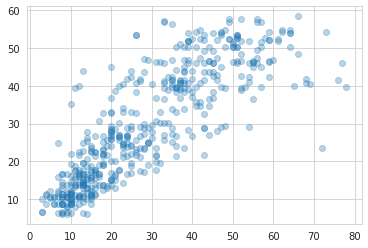

In [8]:
# Evaluate the model using the Mean Absolute Error
from sklearn.metrics import mean_absolute_error
print('MAE', mean_absolute_error(y_test, y_pred))

# plot the results
plt.scatter(y_test, y_pred, alpha=0.3)
plt.show()

In [9]:
print(model)
fi = []
for i, col in enumerate(X_test.columns):
    fi.append([col, model.feature_importances_[i]])
features = pd.DataFrame(fi).sort_values(1, ascending=False)
print(type(features))
print(features)
useless = list(features.loc[features[1] < 0.0003, 0])
print(useless)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
<class 'pandas.core.frame.DataFrame'>
           0     1
0        day 0.307
1      night 0.279
2         DI 0.081
8         SA 0.073
23  16-17-18 0.043
9          1 0.028
20        12 0.022
7         VE 0.021
19        11 0.016
4         MA 0.013
17         9 0.013
3         LU 0.012
14         6 0.012
21     11-12 0.012
15         7 0.010
11         3 0.009
13         5 0.008
6         JE 0.008
18        10 0.008
5         ME 0.007
10         2 0.006
16         8 0.005
22  13-14-15 0.004
12         4 0.003
24        19 0.000
['19

In [11]:
from sklearn.externals import joblib
joblib.dump(model, 'model.joblib')

['model.joblib']

In [5]:
sc.stop()